## Image Format Converter

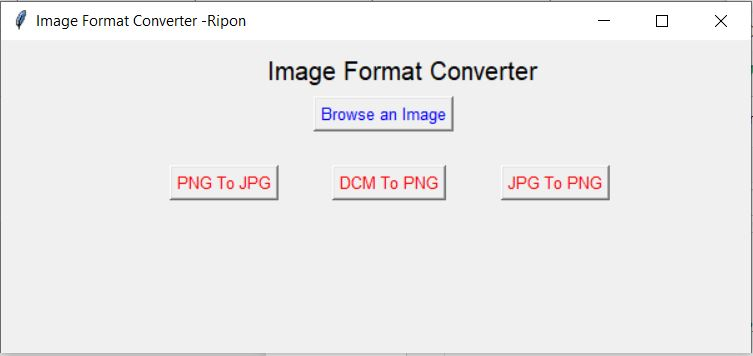

## Importing libraries and modules

In [1]:
#importing libraries and modules
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image
import numpy as np
import pydicom
import pylab

#### Tkinter Module – This module aids in the creation of our project's GUI Window. Filedialog will assist us in browsing and saving files from the system.
#### PIL Library – PIL stands for Python Image Library. This library will assist us in changing the image's extension and saving it with a new extension in this project..
### Create a Function for Browsing an Image File from the System:

In [2]:
# dFile=pydicom.read_file("dcm_image/0015.DCM") #path to file
# pylab.imshow(dFile.pixel_array,cmap=pylab.cm.bone) # pylab readings and conversion
# pylab.show() #Dispaly

In [3]:
#function to browse image
def browse():
    global img
    filename = filedialog.askopenfilename(title = "Select a File",
             initialdir='C:\\',
             filetypes = [('All Files', '*.*'), 
             ('PNG files', '*.png'),
              ('JPG files',"*.jpg"),
              ('DCM files',"*.dcm")])#selecting a file from the system
    if(filename):
        my_str.set(filename)
    if filename[-3:] == 'jpg':
        img = Image.open(filename)#opening the selected file
    elif filename[-3:] == 'png':
        img = Image.open(filename)#opening the selected file
    else:  
        img= pydicom.dcmread(filename) #path to file

- This function will allow us to explore a file on our system..

- filedialog.askopenfilename() – This function displays a window in which we may pick a file to modify. We choose a value and save it in a variable called filename..
- open() – Using the open() function, We'll open the picture file you've chosen. Because the value of the selected picture file is kept in variable filename, we will send it to the open() function.

In [4]:
#function to change from png to jpg
def png_to_jpg():
    global img
    export_file_path = filedialog.asksaveasfilename(defaultextension='.jpg',
                                                   filetypes=[("jpg file", ".jpg")])#choosing the path and changing extension to jpg
    img.save(export_file_path)#saving the file on desired path

- We constructed this function to alter the format from dcm to Png using the same techniques as in the other routines. Only the default extension is changed here; everything else remains the same as in the previous function.

In [5]:
#function to change from dcm to png
def dcm_to_png():
    global img
    new_image = img.pixel_array.astype(float)
    #print(new_image)
    scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
    #print(scaled_image)
    scaled_image = np.uint8(scaled_image)
    final_image = Image.fromarray(scaled_image)
    #final_image.save('image.png')
    export_file_path = filedialog.asksaveasfilename(defaultextension='.png',
                                                   filetypes=[("png file", ".png")])#choosing the path and changing extension to png 
    final_image.save(export_file_path)#saving the file on desired path


In [6]:
#function to change from jpg to png
def jpg_to_png():
    global img
    export_file_path = filedialog.asksaveasfilename(defaultextension='.png',
                                                   filetypes=[("png file", ".png")])#choosing the path and changing extension to jpg 
    img.save(export_file_path)#saving the file on desired path

## Creating the GUI Window:

In [7]:
#creating window
root = Tk()
my_str = tk.StringVar()
Label(root,textvariable=my_str,fg='red' ).place(x=120,y=70)
root.geometry('600x250')#geometry of window
root.title('Image Format Converter -Ripon')#title for window
Label(root,text='Image Format Converter',font='arial 15').place(x=210,y=10)

- Tk() – We generated a window called root with the Tk() technique.
- geometry() – The size of the window is specified by this function.
- title() – provides the newly formed window a title
- Label() – Label is a Gui widget that is typically used to show text on the window. This adds a label to the project's GUI window. A label's color, font, size, height, and width may all be changed. This Label() method was used to show text in this case.
- place() – The place() method aids in the presentation of widgets on the window. We may give the x and y coordinates of a widget and position it using the place() method.

In [8]:
Button(root,text='Browse an Image',command=browse,fg='blue',font='arial 10').place(x=250,y=45)#creating button

- Button() – This aids in the creation of a button on the window. command=browse indicates that the browse function will be invoked whenever this button is pressed. Similarly to the label, we may select the color, font, background color, foreground color, and so on of a button here.

In [9]:
Button(root,text='PNG To JPG',command=png_to_jpg,fg='red',font='arial 10').place(x=135,y=100)
Button(root,text='DCM To PNG',command=dcm_to_png,fg='red',font='arial 10').place(x=265,y=100)
Button(root,text='JPG To PNG',command=jpg_to_png,fg='red',font='arial 10').place(x=400,y=100)

In [10]:
root.mainloop()